# Checking data for DF and its RA

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = "\\".join(os.getcwd().split("\\")[:-1]) # + "\\common_data"
path

'C:\\Users\\Camila\\Documents\\git\\common_data'

In [3]:
df = pd.read_csv(path + "\data\dados-abertos-df.csv", delimiter=";")
df["Data Cadastro"] = pd.to_datetime(df['Data Cadastro'], format="%d/%m/%Y")
df.head(1)

,id,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Estado de Saúde,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
0,1,12/06/2020,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df["Data"].value_counts())
df["Estado de Saúde"].value_counts()

12/06/2020    21396
Name: Data, dtype: int64


Recuperado       11825
Não Informado     8266
Leve               804
Óbito              282
Moderado           162
Grave               57
Name: Estado de Saúde, dtype: int64

In [5]:
ra = df.groupby(["Data Cadastro", "RA"])["id"].count().reset_index()
ra.columns = ["Data Cadastro", "RA", "Casos"]
# Adding rows for ra that don't have cases on the day
for d in ra["Data Cadastro"].sort_values().unique():
    for r in ra["RA"].sort_values().unique():
        if(len(ra[(ra["Data Cadastro"] == d) & (ra["RA"] == r)]) == 0):
            data_to_append = pd.DataFrame([[d, r, 0]], columns=ra.columns) 
            ra = ra.append(data_to_append)
ra[ra["RA"] == "Entorno DF"].tail(10)

,Data Cadastro,RA,Casos
0,2020-04-07,Entorno DF,0
0,2020-04-08,Entorno DF,0
0,2020-04-09,Entorno DF,0
0,2020-04-12,Entorno DF,0
0,2020-04-14,Entorno DF,0
0,2020-04-20,Entorno DF,0
0,2020-04-22,Entorno DF,0
0,2020-04-25,Entorno DF,0
0,2020-06-10,Entorno DF,0
0,2020-06-12,Entorno DF,0


In [6]:
ra.sort_values("Data Cadastro", inplace=True)
ra["Casos Acumulados"] = ra.groupby("RA")['Casos'].transform(pd.Series.cumsum)
ra[ra["RA"] == "Entorno DF"].tail(10)

,Data Cadastro,RA,Casos,Casos Acumulados
1542,2020-06-03,Entorno DF,52,724
1576,2020-06-04,Entorno DF,83,807
1610,2020-06-05,Entorno DF,69,876
1644,2020-06-06,Entorno DF,78,954
1680,2020-06-07,Entorno DF,38,992
1716,2020-06-08,Entorno DF,29,1021
1749,2020-06-09,Entorno DF,44,1065
0,2020-06-10,Entorno DF,0,1065
1818,2020-06-11,Entorno DF,29,1094
0,2020-06-12,Entorno DF,0,1094


In [8]:
# Checando se os dados sao os mesmos da planilha em Excel
ra.to_csv('casos_df_por_dia.csv', encoding='utf-8')

In [9]:
graph = pd.crosstab(columns=ra["Data Cadastro"], index=ra["RA"], values= ra["Casos"], aggfunc="sum")
graph = graph.replace({0:np.nan})
graph.tail()

Data Cadastro,2020-03-01,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,...,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12
RA,,,,,,,,,,,,,,,,,,,,,
São Sebastião,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,19.0,20.0,34.0,69.0,62.0,20.0,50.0,35.0,32.0,19.0
Taguatinga,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,...,59.0,65.0,117.0,108.0,47.0,33.0,89.0,71.0,66.0,45.0
Varjão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,1.0,2.0,2.0,1.0
Vicente Pires,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,12.0,10.0,16.0,15.0,4.0,3.0,27.0,24.0,13.0,7.0
Águas Claras,NaN,NaN,NaN,3.0,3.0,1.0,3.0,2.0,1.0,3.0,...,27.0,25.0,31.0,48.0,7.0,3.0,53.0,41.0,36.0,34.0


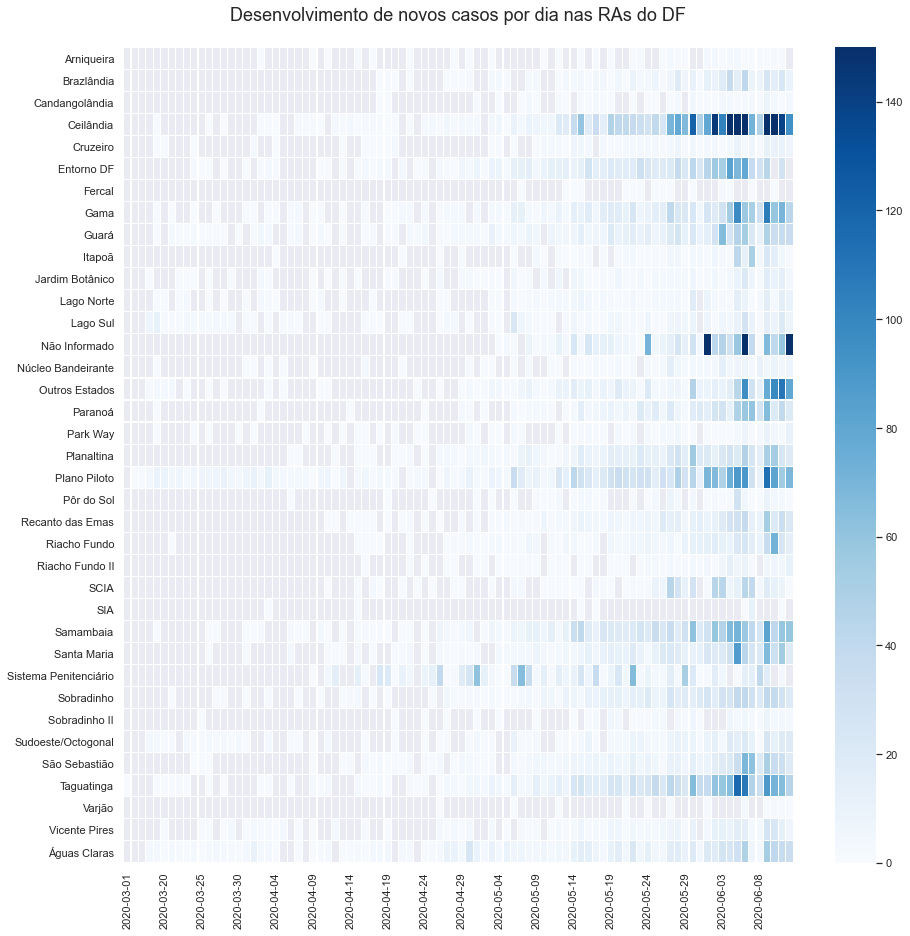

In [23]:
graph = pd.crosstab(columns=ra["Data Cadastro"], index=ra["RA"], values= ra["Casos"], aggfunc="sum").replace({0:np.nan})

import seaborn as sns
# import colorsys

# colors = ["#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]
colors = ["#6B8E23", "#708224", "#757525", "#7A6925", "#7F5D26", "#855027", '#8A4428', '#8F3828', '#942B29', "#991f2a"]
colors = ['#ffba08', '#faa307', '#f48c06', '#e85d04', '#dc2f02', '#d00000', '#9d0208', '#6a040f', '#370617', '#03071e']

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, vmax=150, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de novos casos por dia nas RAs do DF\n", fontsize=18)
ax.set(xlabel="", ylabel="")
ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()

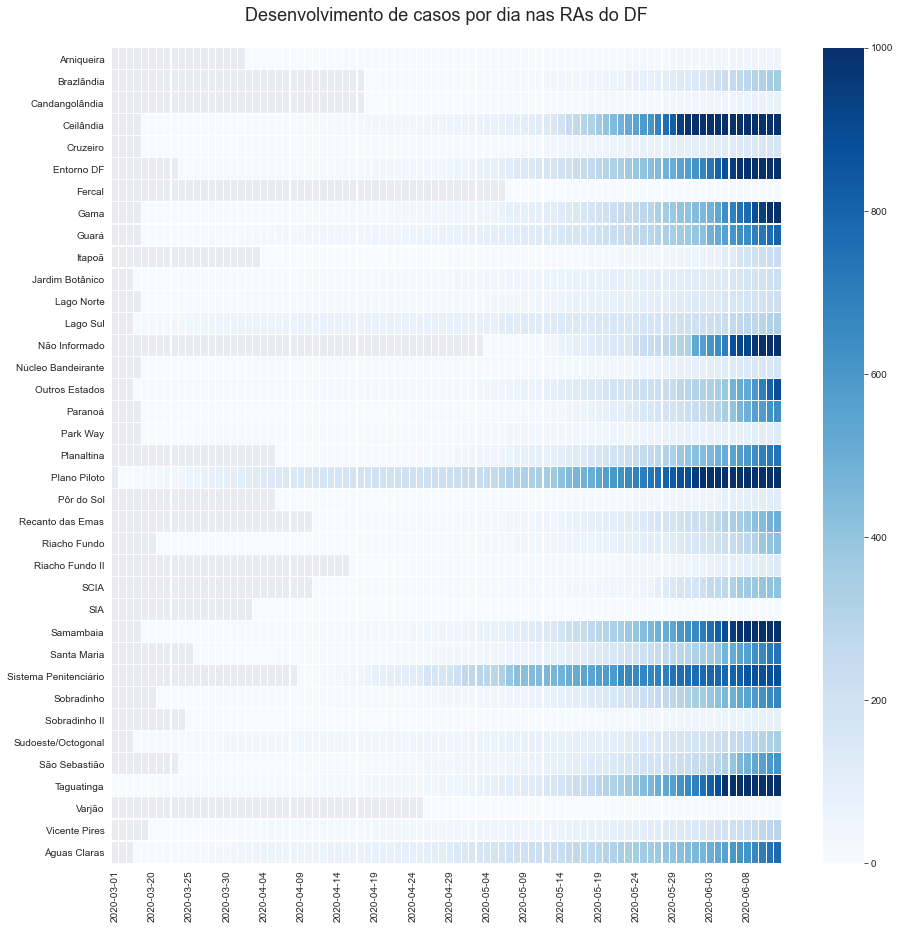

In [11]:
graph = pd.crosstab(columns=ra["Data Cadastro"], index=ra["RA"], values= ra["Casos Acumulados"], aggfunc="sum").replace({0:np.nan})

import seaborn as sns
# import colorsys

sns.set_style("dark")

# colors = ["#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]
colors = ["#6B8E23", "#708224", "#757525", "#7A6925", "#7F5D26", "#855027", '#8A4428', '#8F3828', '#942B29', "#991f2a"]
colors = ['#ffba08', '#faa307', '#f48c06', '#e85d04', '#dc2f02', '#d00000', '#9d0208', '#6a040f', '#370617', '#03071e']

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, vmax=1000, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de casos por dia nas RAs do DF\n", fontsize=18)
ax.set(xlabel="", ylabel="")

ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()